In [ ]:
import numpy as np, tensorflow as tf, matplotlib.pyplot as plt, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
rng=np.random.RandomState(42)
n=600
x=pd.DataFrame(
    {
        "Size_sqft":rng.normal(1200,300,n).clip(400,3000),
        "Rooms":rng.randint(1,6,n),
        "Age_yrs":rng.randint(0,30,n)
    }
)
noise=rng.normal(0,2000,n)
y=80*x["Size_sqft"]+1500*x["Rooms"]-1200*x["Age_yrs"]+5000+noise
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#transfor using StandardScalar
scalar=StandardScaler()
x_train_tr=scalar.fit_transform(x_train)
x_test_tr=scalar.transform(x_test)
print(x_train)
print(x_train_tr)

       Size_sqft  Rooms  Age_yrs
145  1434.546862      2       22
9    1362.768013      2       28
375   969.795731      1        0
523  1371.179601      5       24
188   945.961885      3       25
..           ...    ...      ...
71   1661.410970      3       21
106  1765.855770      1       10
270  1632.381987      1        7
435  1222.228434      1        5
102  1097.185645      5       22

[480 rows x 3 columns]
[[ 0.84064839 -0.67166527  0.91267086]
 [ 0.59449956 -0.67166527  1.62596586]
 [-0.75310727 -1.37253337 -1.70274414]
 ...
 [ 1.51907783 -1.37253337 -0.87056664]
 [ 0.11255184 -1.37253337 -1.10833164]
 [-0.31625326  1.43093905  0.91267086]]


In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train_tr.shape[1],)),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.mse,
              metrics=["mae"]
)

In [ ]:
history=model.fit(x_train_tr,y_train,epochs=100,validation_data=(x_test_tr,y_test),batch_size=32)
#

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 7897617920.0000 - mae: 85546.3672 - val_loss: 8752281600.0000 - val_mae: 90463.9844
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7897527296.0000 - mae: 85545.8125 - val_loss: 8752167936.0000 - val_mae: 90463.3516
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7897411072.0000 - mae: 85545.1172 - val_loss: 8752003072.0000 - val_mae: 90462.4609
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7897242624.0000 - mae: 85544.1250 - val_loss: 8751760384.0000 - val_mae: 90461.1484
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7896997888.0000 - mae: 85542.7031 - val_loss: 8751409152.0000 - val_mae: 90459.2734
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7896645632.0000 - mae: 85540.6641 - val_loss: 8750906368.0000 - val_mae: 90456.6016
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7896147968.0000 - mae: 85537.8125 - val_loss: 8750212096.0000 - val_mae: 904

In [ ]:
loss,mae=model.evaluate(x_test_tr,y_test,verbose=0)
print(f"MAE:{mae}")

MAE:61951.33984375


In [ ]:
y_pred=model.predict(x_test_tr)
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[ 9641.319 ]
 [23839.    ]
 [23379.084 ]
 [21871.28  ]
 [ 8883.919 ]
 [55985.695 ]
 [17358.148 ]
 [12898.773 ]
 [26179.62  ]
 [33306.883 ]
 [38039.723 ]
 [47708.34  ]
 [21099.238 ]
 [36475.95  ]
 [20815.406 ]
 [56278.86  ]
 [19687.254 ]
 [47236.285 ]
 [21419.98  ]
 [48828.566 ]
 [36287.1   ]
 [10121.375 ]
 [23264.86  ]
 [22807.68  ]
 [24374.924 ]
 [18657.627 ]
 [21534.938 ]
 [46571.59  ]
 [19059.463 ]
 [13858.381 ]
 [15052.896 ]
 [11138.906 ]
 [57620.508 ]
 [22743.434 ]
 [36516.117 ]
 [37012.69  ]
 [17565.832 ]
 [33601.13  ]
 [30788.143 ]
 [28799.219 ]
 [31495.625 ]
 [25802.426 ]
 [13367.805 ]
 [26905.535 ]
 [16745.982 ]
 [21708.904 ]
 [44126.38  ]
 [20265.352 ]
 [ 9924.003 ]
 [24911.21  ]
 [21336.871 ]
 [52377.902 ]
 [22238.484 ]
 [24634.69  ]
 [19326.738 ]
 [25916.162 ]
 [99246.65  ]
 [36390.42  ]
 [22906.473 ]
 [33490.676 ]
 [29694.945 ]
 [24104.871 ]
 [33239.547 ]
 [18601.533 ]
 [33173.79  ]
 [27091.893 ]
 [62102.96  ]
 [ 8494.853 ]
 [37802.47

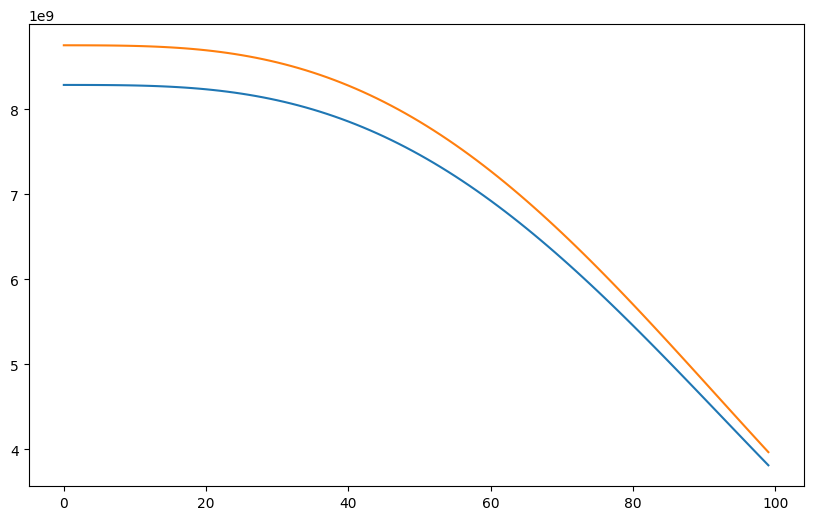

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")

Text(0.5, 1.0, 'Actual vs Predicted')

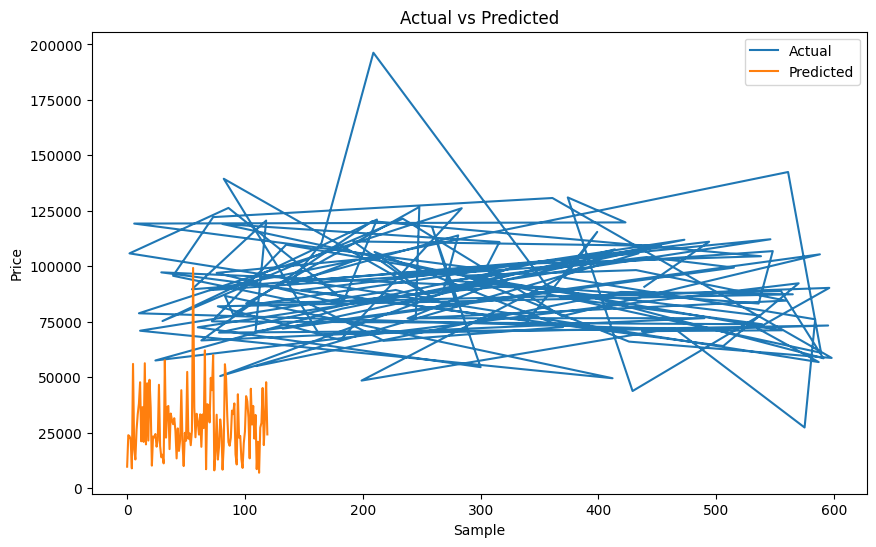

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test,label="Actual")
plt.plot(y_pred,label="Predicted")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs Predicted")


In [ ]:
y_pred=model.predict(x_test_tr)
print(y_pred.flatten())
print(y_test.values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[ 9641.319  23839.     23379.084  21871.28    8883.919  55985.695
 17358.148  12898.773  26179.62   33306.883  38039.723  47708.34
 21099.238  36475.95   20815.406  56278.86   19687.254  47236.285
 21419.98   48828.566  36287.1    10121.375  23264.86   22807.68
 24374.924  18657.627  21534.938  46571.59   19059.463  13858.381
 15052.896  11138.906  57620.508  22743.434  36516.117  37012.69
 17565.832  33601.13   30788.143  28799.219  31495.625  25802.426
 13367.805  26905.535  16745.982  21708.904  44126.38   20265.352
  9924.003  24911.21   21336.871  52377.902  22238.484  24634.69
 19326.738  25916.162  99246.65   36390.42   22906.473  33490.676
 29694.945  24104.871  33239.547  18601.533  33173.79   27091.893
 62102.96    8494.853  37802.473  37458.258  29602.824  49718.26
 44133.71   59982.027   7986.4316 16536.     33076.523  12848.206
 18604.605  30950.969  26069.688   8300.254  19223.877  55838.4
 49459.348  32453.686  20710.719  19083.988  

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


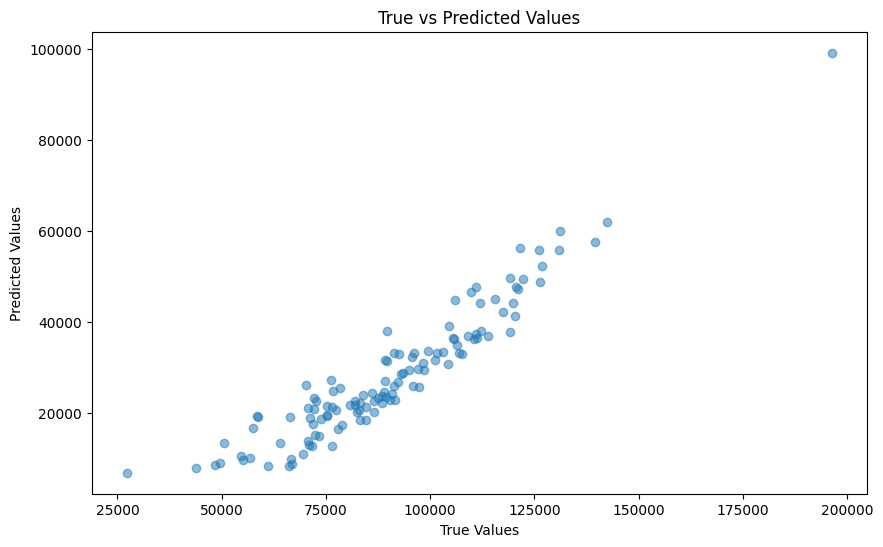

In [ ]:
y_pred=model.predict(x_test_tr).flatten()
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

In [ ]:
print(y_pred.shape)
print(y_pred.shape)

(120,)
(120,)
